In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="Set2")

# Check versions (optional)
import sys
print("Python version:", sys.version)
print("Pandas version:", pd.__version__)

Matplotlib is building the font cache; this may take a moment.


Python version: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
Pandas version: 2.2.2


In [4]:
# Load dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Display basic info
df.info()

# First few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [5]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

# Target distribution
print("\nAttrition Distribution:")
print(df['Attrition'].value_counts(normalize=True) * 100)

# Data types summary
df.dtypes.value_counts()

Dataset Shape: (1470, 31)

Missing Values:
 0

Duplicate Rows: 0

Attrition Distribution:
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


int64     23
object     8
Name: count, dtype: int64

In [6]:
# Summary statistics for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5832\2644532040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Attrition', palette='coolwarm')


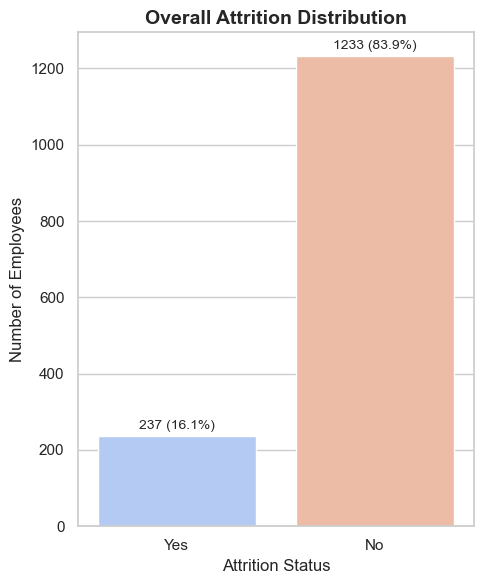

In [19]:
plt.figure(figsize=(5,6))
ax = sns.countplot(data=df, x='Attrition', palette='coolwarm')
plt.title("Overall Attrition Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Attrition Status", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)

# --- Add data labels with percentages ---
total = len(df)  # total number of employees

for container in ax.containers:
    labels = []
    for bar in container:
        count = bar.get_height()
        percent = (count / total) * 100
        labels.append(f'{int(count)} ({percent:.1f}%)')
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()



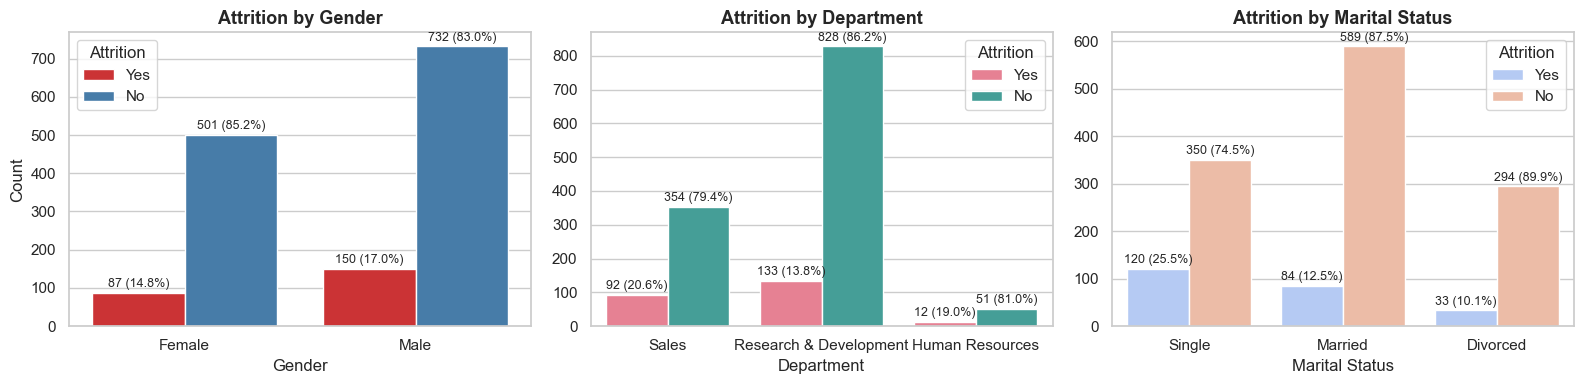

In [21]:
# Create 3 subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# --- Plot 1: Gender ---
sns.countplot(data=df, x='Gender', hue='Attrition', ax=axes[0], palette='Set1')
axes[0].set_title("Attrition by Gender", fontsize=13, fontweight='bold')
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")

# --- Plot 2: Department ---
sns.countplot(data=df, x='Department', hue='Attrition', ax=axes[1], palette='husl')
axes[1].set_title("Attrition by Department", fontsize=13, fontweight='bold')
axes[1].set_xlabel("Department")
axes[1].set_ylabel("")

# --- Plot 3: Marital Status ---
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', ax=axes[2], palette='coolwarm')
axes[2].set_title("Attrition by Marital Status", fontsize=13, fontweight='bold')
axes[2].set_xlabel("Marital Status")
axes[2].set_ylabel("")

# --- Function to add count + percentage labels ---
def add_labels_with_percent(ax, group_col):
    # Calculate total counts for each group (e.g., Gender, Department)
    totals = df[group_col].value_counts()
    total_records = len(df)
    
    for container in ax.containers:
        labels = []
        for bar in container:
            count = bar.get_height()
            if count == 0:
                labels.append("")
                continue
            # Get category (x tick label)
            category_index = int(round(bar.get_x() + bar.get_width()/2))
            if category_index < len(ax.get_xticklabels()):
                category = ax.get_xticklabels()[category_index].get_text()
                percent = (count / totals[category]) * 100
                overall_percent = (count / total_records) * 100
                labels.append(f'{int(count)} ({percent:.1f}%)')
            else:
                labels.append(f'{int(count)}')
        ax.bar_label(container, labels=labels, label_type='edge', fontsize=9, padding=2)

# Apply function to each subplot
add_labels_with_percent(axes[0], 'Gender')
add_labels_with_percent(axes[1], 'Department')
add_labels_with_percent(axes[2], 'MaritalStatus')

plt.tight_layout()
plt.show()


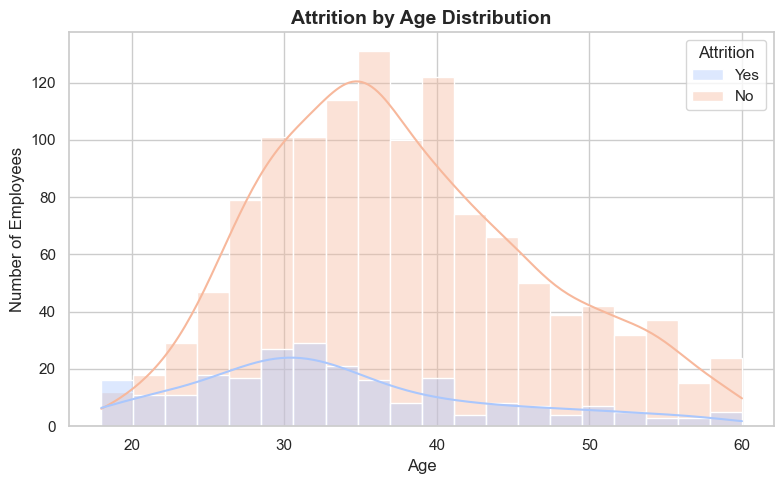

In [23]:
plt.figure(figsize=(8,5))

# Draw overlapping histograms for each Attrition group with KDE (density curve)
sns.histplot(data=df, x='Age', hue='Attrition', bins=20, kde=True, stat='count', multiple='layer', palette='coolwarm', alpha=0.4)

# Customize titles and labels
plt.title("Attrition by Age Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)

plt.tight_layout()
plt.show()


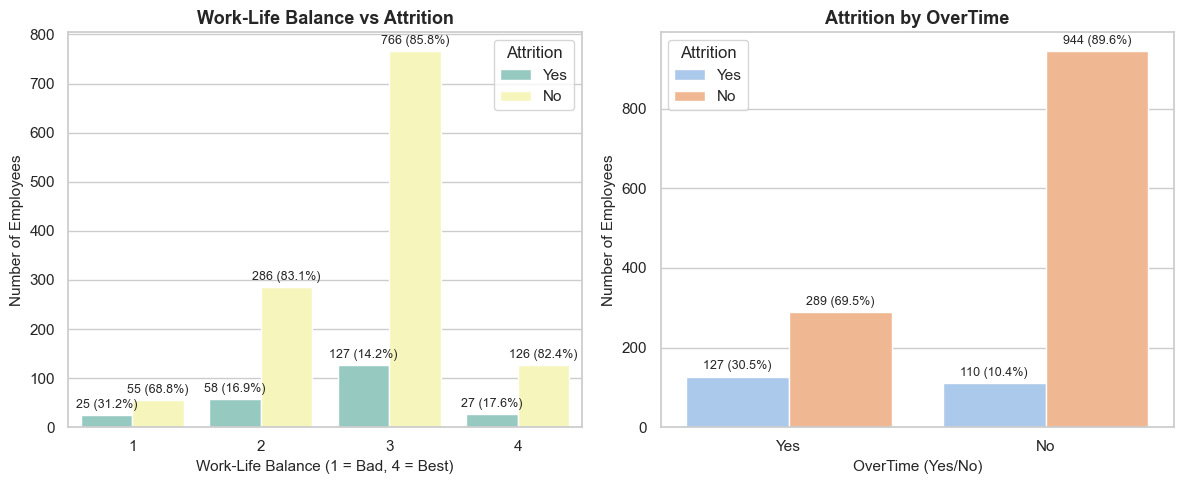

In [31]:
# Create 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# -------------------------------
# 🔹 Plot 1: Work-Life Balance vs Attrition
# -------------------------------
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition', palette='Set3', ax=axes[0])
axes[0].set_title("Work-Life Balance vs Attrition", fontsize=13, fontweight='bold')
axes[0].set_xlabel("Work-Life Balance (1 = Bad, 4 = Best)", fontsize=11)
axes[0].set_ylabel("Number of Employees", fontsize=11)

# Add data labels + percentages
balance_totals = df['WorkLifeBalance'].value_counts()
for container in axes[0].containers:
    labels = []
    for bar in container:
        count = bar.get_height()
        if count == 0:
            labels.append("")
            continue
        x_index = int(round(bar.get_x() + bar.get_width()/2))
        category = axes[0].get_xticklabels()[x_index].get_text()
        percent = (count / balance_totals[int(category)]) * 100
        labels.append(f'{int(count)} ({percent:.1f}%)')
    axes[0].bar_label(container, labels=labels, label_type='edge', fontsize=9, padding=3)

# -------------------------------
# 🔹 Plot 2: OverTime vs Attrition
# -------------------------------
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='pastel', ax=axes[1])
axes[1].set_title("Attrition by OverTime", fontsize=13, fontweight='bold')
axes[1].set_xlabel("OverTime (Yes/No)", fontsize=11)
axes[1].set_ylabel("Number of Employees", fontsize=11)

# Add data labels + percentages
overtime_totals = df['OverTime'].value_counts()
for container in axes[1].containers:
    labels = []
    for bar in container:
        count = bar.get_height()
        if count == 0:
            labels.append("")
            continue
        x_index = int(round(bar.get_x() + bar.get_width()/2))
        category = axes[1].get_xticklabels()[x_index].get_text()
        percent = (count / overtime_totals[category]) * 100
        labels.append(f'{int(count)} ({percent:.1f}%)')
    axes[1].bar_label(container, labels=labels, label_type='edge', fontsize=9, padding=3)

# -------------------------------
# Final layout adjustments
# -------------------------------
plt.tight_layout()
plt.show()


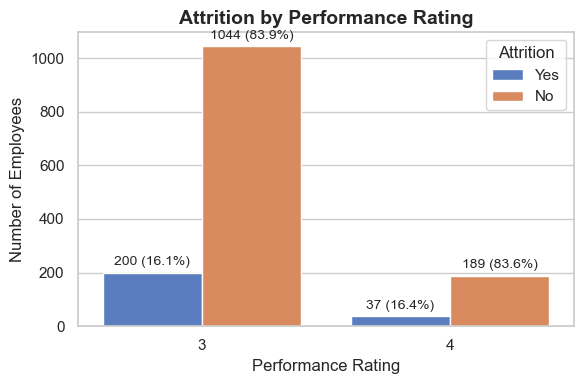

In [32]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='PerformanceRating', hue='Attrition', palette='muted')

# Titles and labels
plt.title("Attrition by Performance Rating", fontsize=14, fontweight='bold')
plt.xlabel("Performance Rating", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)

# --- Add data labels with percentages ---
total = len(df)
rating_totals = df['PerformanceRating'].value_counts()  # total per rating

for container in ax.containers:
    labels = []
    for bar in container:
        count = bar.get_height()
        if count == 0:
            labels.append("")
            continue
        
        # Get x-tick label (Performance Rating)
        x_index = int(round(bar.get_x() + bar.get_width()/2))
        category = ax.get_xticklabels()[x_index].get_text()
        
        # Calculate % within each rating group
        percent = (count / rating_totals[int(category)]) * 100
        
        labels.append(f'{int(count)} ({percent:.1f}%)')
    
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()


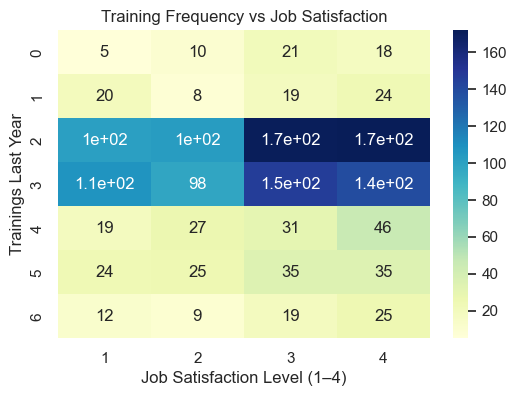

In [33]:
pivot = pd.crosstab(df['TrainingTimesLastYear'], df['JobSatisfaction'])
plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title("Training Frequency vs Job Satisfaction")
plt.xlabel("Job Satisfaction Level (1–4)")
plt.ylabel("Trainings Last Year")
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5832\1264524871.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='coolwarm')


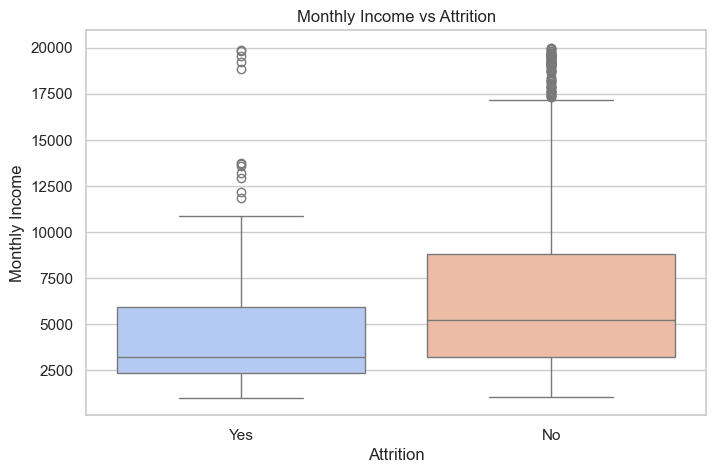

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='coolwarm')
plt.title("Monthly Income vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.show()


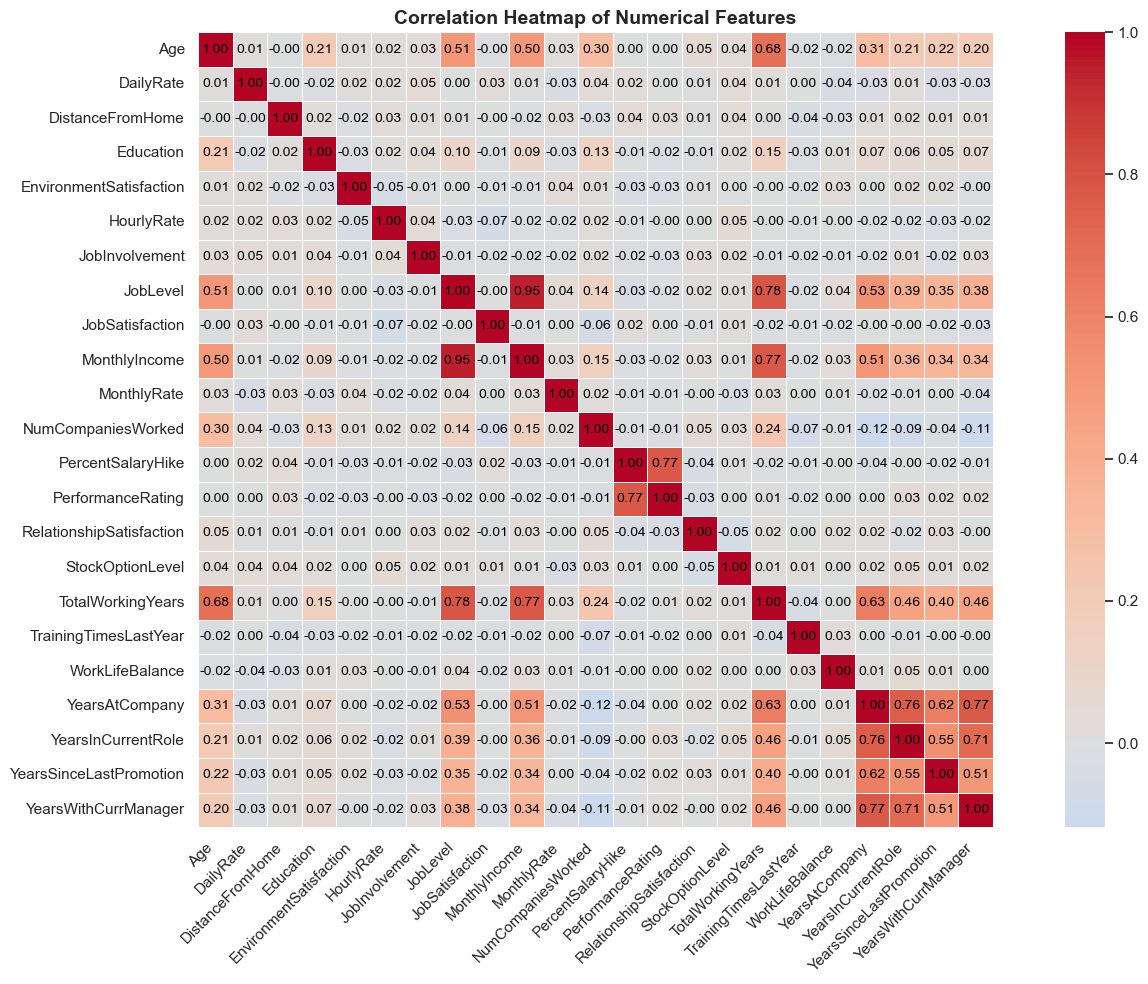

In [48]:
plt.figure(figsize=(15,10))

# Compute correlation for numeric columns
corr = df.select_dtypes(include=['int64', 'float64']).corr()

# Create heatmap with annotations (numbers)
sns.heatmap(
    corr, 
    cmap='coolwarm', 
    center=0, 
    square=True, 
    linewidths=.5, 
    annot=True,        # show numbers
    fmt=".2f",         # format numbers to 2 decimal places
    annot_kws={"size": 10, "color": "black"}  # adjust text size and color
)

# Title
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,87.41,69.23,38.30,49.32,80.57
3,SVM,85.37,66.67,17.02,27.12,80.91
2,Random Forest,84.01,50.00,12.77,20.34,79.27
1,Decision Tree,78.23,31.91,31.91,31.91,59.48


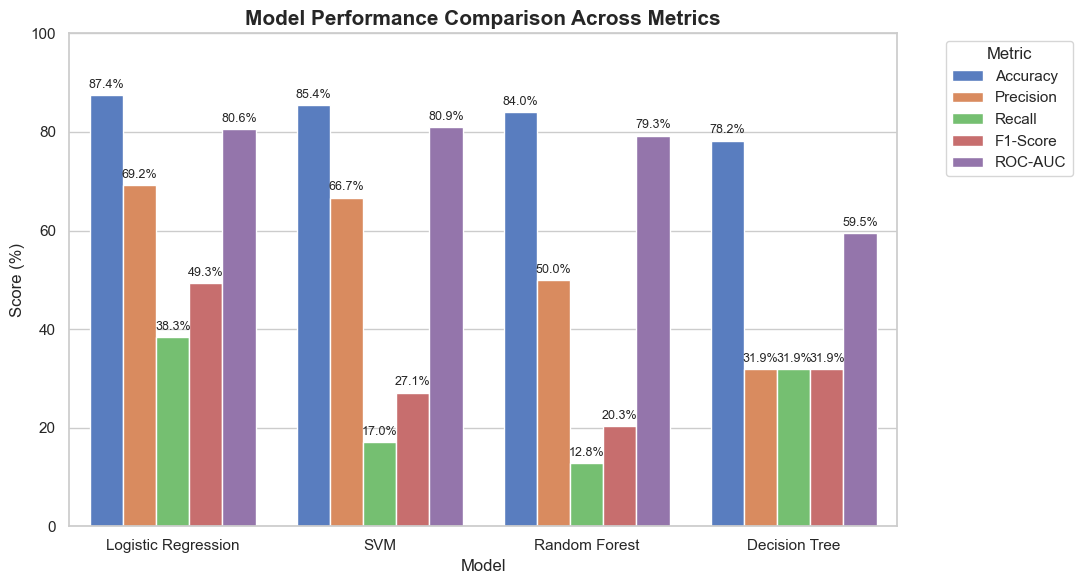

In [52]:
# --------------------------------------------------------
# MODEL PERFORMANCE COMPARISON + VISUALIZATION (with % labels)
# --------------------------------------------------------

# 📦 Import Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1️⃣ Load and Prepare Dataset
# -------------------------------
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -------------------------------
# 2️⃣ Initialize Models
# -------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# -------------------------------
# 3️⃣ Train, Predict & Evaluate
# -------------------------------
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    results.append({
        "Model": name,
        "Accuracy": round(acc * 100, 2),
        "Precision": round(prec * 100, 2),
        "Recall": round(rec * 100, 2),
        "F1-Score": round(f1 * 100, 2),
        "ROC-AUC": round(roc_auc * 100, 2)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
display(results_df)

# -------------------------------
# 4️⃣ Visualization with Percentage Labels
# -------------------------------
sns.set(style="whitegrid", palette="muted")

# Melt for Seaborn compatibility
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(11,6))
ax = sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric")

# Title & labels
plt.title("Model Performance Comparison Across Metrics", fontsize=15, fontweight='bold')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score (%)", fontsize=12)
plt.ylim(0, 100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Metric")

# Add % labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()


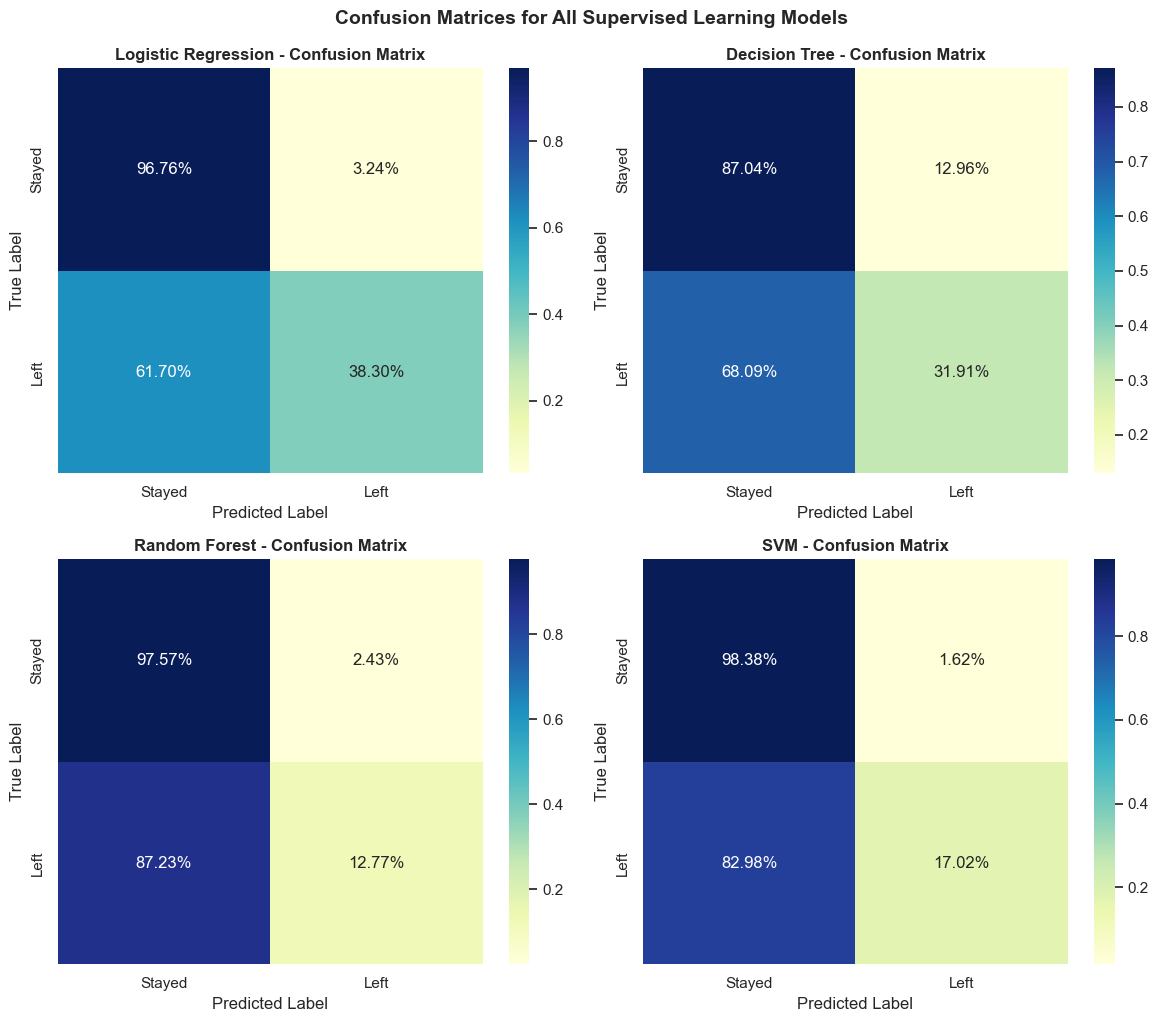

In [53]:
# --------------------------------------------------------
# CONFUSION MATRIX VISUALIZATION FOR ALL MODELS
# --------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Reuse trained models (make sure models dict, X_test, y_test already exist)

# Define figure layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Titles for plots
titles = list(models.keys())

# Generate confusion matrix for each model
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize to %

    sns.heatmap(cm_norm, annot=True, fmt=".2%", cmap="YlGnBu", ax=axes[i])
    axes[i].set_title(f"{name} - Confusion Matrix", fontsize=12, fontweight='bold')
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")
    axes[i].set_xticklabels(["Stayed", "Left"])
    axes[i].set_yticklabels(["Stayed", "Left"])

plt.tight_layout()
plt.suptitle("Confusion Matrices for All Supervised Learning Models", fontsize=14, fontweight='bold', y=1.02)
plt.show()
